## **Bank Customer Churn Prediction**

### **1. Introduction**

#### **1.1 Objectives**
1. Conduct data exploration and data cleaning
2. Conduct descriptive analysis of the data.
3. Determine relationship between variables.
4. Conduct churn prediction, given the variables in the dataset.
5. Share insights and findings through visualizations and observations.

#### **1.2 Methodology**
1. Use Python and necessary packages in conducting exploratory data analysis and data visualizations.
2. Check the dataset for incorrect datatypes and data.
3. Check the dataset for null values.
4. If there are incorrect datatypes and data and presence of null values, employ necessary actions to correct the data.
5. Create additional columns (if necessary) by using data extracted from an existing column.
6. Create data visualizations for descriptive analysis.
7. Plot relationship between variables using visualization tools such as Seaborn and Matplotlib.
8. Write observations based on the results of the analysis.
9. Create a machine learning model to predict the likelihood that a customer will churn, based on the variables in the dataset.
10. Evaluate the results of the machine learning model and share insights and recommendations.

#### **1.3 Description of Variables**

Column | Description
----- | -----
customer_id |unique identifier for each customer
vintage |the duration of the customer's relationship with the company
age |age of the customer
gender |gender of the customer
dependents |number of dependents the customer has
occupation |the occupation of the customer
city |city in which the customer is located
customer_nw_category |net worth category of the customer
branch_code |code identifying the branch associated with the customer
current_balance |current balance in the customer's account
previous_month_end_balance |account balance at the end of the previous month
average_monthly_balance_prevQ |average monthly balance in the previous quarter
average_monthly_balance_prevQ2 |average monthly balance in the second previous quarter
current_month_credit |credit amount in the current month
previous_month_credit |credit amount in the previous month
current_month_debit |debit amount in the current month
previous_month_debit |debit amount in the previous month
current_month_balance |account balance in the current month
previous_month_balance |account balance in the previous month
churn |variable indicating whether the customer has churned(1 - churned, 0 - not churned)
last_transaction |timestamp of the customer's last transaction


### **2. Data Preparation**

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [278]:
df = pd.read_csv("D:\Documents\CSV Datasets\Bank Churn\churn_prediction.csv")

In [279]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


### **3. Data Cleaning**

In [280]:
print(df.shape)

(28382, 21)


In [281]:
## Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [282]:
## Check the percentage of null values for each column in the dataset
for col in df.columns:
    print('Null Values for column {} is {}%'.format(col, np.round(df[col].isnull().sum()*100 / len(df[col])),2))

Null Values for column customer_id is 0.0%
Null Values for column vintage is 0.0%
Null Values for column age is 0.0%
Null Values for column gender is 2.0%
Null Values for column dependents is 9.0%
Null Values for column occupation is 0.0%
Null Values for column city is 3.0%
Null Values for column customer_nw_category is 0.0%
Null Values for column branch_code is 0.0%
Null Values for column current_balance is 0.0%
Null Values for column previous_month_end_balance is 0.0%
Null Values for column average_monthly_balance_prevQ is 0.0%
Null Values for column average_monthly_balance_prevQ2 is 0.0%
Null Values for column current_month_credit is 0.0%
Null Values for column previous_month_credit is 0.0%
Null Values for column current_month_debit is 0.0%
Null Values for column previous_month_debit is 0.0%
Null Values for column current_month_balance is 0.0%
Null Values for column previous_month_balance is 0.0%
Null Values for column churn is 0.0%
Null Values for column last_transaction is 0.0%


### Findings
1. The dataset contains incorrect datatypes, such as:
   - dependents (datatype is `float64` - will be changed into `int64`)
   - city (datatype is `float64` - will be changed into `int64`)
2. The dataset contains null values in the following columns:
   - gender (2.0% of the total)
   - dependents (9.0% of the total)
   - city (3.0% of the total)
3. The column `last_transaction` has object datatype but contains both datetime in YYYY-MM-DD format and string value of NaT which means no transaction.

### Actions
#### Incorrect datatypes
1. Change datatype for columns `dependents` and `city` into `int64`.

#### Null values
1. There are values of 0.0 in the `dependents` column, which means that the customer has no dependent, therefore, the null value for this column does not indicate that a customer has no dependent. It is not advisable to imputate values for this column due to the percentage of null values for this variable to be more than 5.0%, which might cause over-representation, and due to the fact that the values for this column is customer-inputted, and cannot be imputated by the column's mean, median, or mode values.
2. The same will be done for the columns `gender` and `city`, despite the percentage of null values to be less than 5.0%, the values for these columns are also customer-inputted, and cannot be imputated by the column's mean, median, and mode values.

#### Varying datatypes in `last_transaction` column
1. Change the datatype for the `last_transaction` column into `datetime`. The NaT values will be converted into 0000-00.
2. Create a new column `last_transaction_period` containing YYYY-MM values from the `last_transaction` column and will be in `period` datatype.

In [283]:
## Drop null values for all columns
df = df.dropna(axis=0)

In [284]:
## Change datatype for 'dependents' and 'city' columns into int64
df[['dependents','city']] = df[['dependents','city']].astype('int64')

## Change datatype of 'last_transaction' column into datetime
df['last_transaction'] = pd.to_datetime(df['last_transaction'], errors='coerce').replace('Nat','0000-00')
df['last_transaction_period'] = df['last_transaction'].dt.to_period('M').replace('NaT', '0000-00')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24832 entries, 0 to 28381
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     24832 non-null  int64         
 1   vintage                         24832 non-null  int64         
 2   age                             24832 non-null  int64         
 3   gender                          24832 non-null  object        
 4   dependents                      24832 non-null  int64         
 5   occupation                      24832 non-null  object        
 6   city                            24832 non-null  int64         
 7   customer_nw_category            24832 non-null  int64         
 8   branch_code                     24832 non-null  int64         
 9   current_balance                 24832 non-null  float64       
 10  previous_month_end_balance      24832 non-null  float64       
 11  average

In [285]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,last_transaction_period
0,1,2101,66,Male,0,self_employed,187,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,2019-05
2,4,2194,31,Male,0,salaried,146,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,NaT
4,6,1579,42,Male,2,self_employed,1494,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,2019-11
5,7,1923,42,Female,0,self_employed,1096,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01,2019-11
6,8,2048,72,Male,0,retired,1020,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24,2019-09


There are **3,550** rows that were dropped that contains null values. The datatype for all the column have now been corrected.

#### **3.1 Descriptive Statistics of the Data**

In [286]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
count,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,24832.000000,22067
mean,15120.719555,2090.259907,47.818903,0.352368,798.836783,2.215689,864.746013,7.005608e+03,7.102969e+03,7.068944e+03,6.641527e+03,3.504050e+03,3.360356e+03,3.661734e+03,3.343667e+03,7.040927e+03,7.075169e+03,0.181943,2019-10-25 01:33:54.186794752
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,2018-12-31 00:00:00
25%,7525.500000,1957.000000,36.000000,0.000000,409.000000,2.000000,159.000000,1.799033e+03,1.916702e+03,2.193320e+03,1.847767e+03,3.300000e-01,3.300000e-01,4.300000e-01,4.300000e-01,2.018133e+03,2.083472e+03,0.000000,2019-10-02 00:00:00
50%,15117.500000,2153.000000,46.000000,0.000000,837.000000,2.000000,531.000000,3.294560e+03,3.387745e+03,3.539225e+03,3.371800e+03,6.300000e-01,6.600000e-01,1.290450e+02,1.430700e+02,3.451155e+03,3.459390e+03,0.000000,2019-12-03 00:00:00
75%,22680.250000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1364.000000,6.629138e+03,6.655170e+03,6.662980e+03,6.517560e+03,7.149600e+02,8.146525e+02,1.428592e+03,1.428630e+03,6.664008e+03,6.648450e+03,0.000000,2019-12-20 00:00:00
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,1.398486e+06,1.398486e+06,1.398486e+06,1.389627e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.398486e+06,1.398486e+06,1.000000,2019-12-31 00:00:00
std,8736.591147,273.916048,16.864493,1.007858,430.826252,0.663905,890.994940,2.130752e+04,2.200392e+04,2.047696e+04,1.866737e+04,8.166208e+04,3.069930e+04,5.401130e+04,2.376745e+04,2.073199e+04,2.194976e+04,0.385805,NaN


1. The customer with the longest relationship with the company has a `vintage` value of **2476 days**, while the customer with the shortest relationship with the company has a `vintage` value of **73 days**.
2. The oldest customer in the bank is **90 years old**, while the youngest is **1 year old**.
3. The customer with the most number of dependents has **52**, which is clearly an outlier based on the mean dependent value of **0.352** with a standard deviation of **1.008**. This value will be dropped.
4. The net worth category in the dataset ranges from **1 to 3**. However, the description does not indicate the details for these categories. These categories will be investigated later.
5. The highest current balance, previous month end balance, and average monthly balance for the previous two quarters are the same at **1,398,486**.

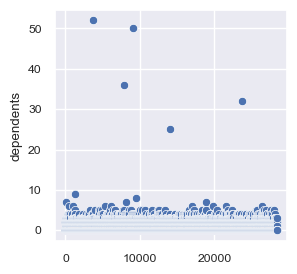

In [287]:
## Check outliers in the 'dependents' column
fig = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=df['dependents'])

plt.show()

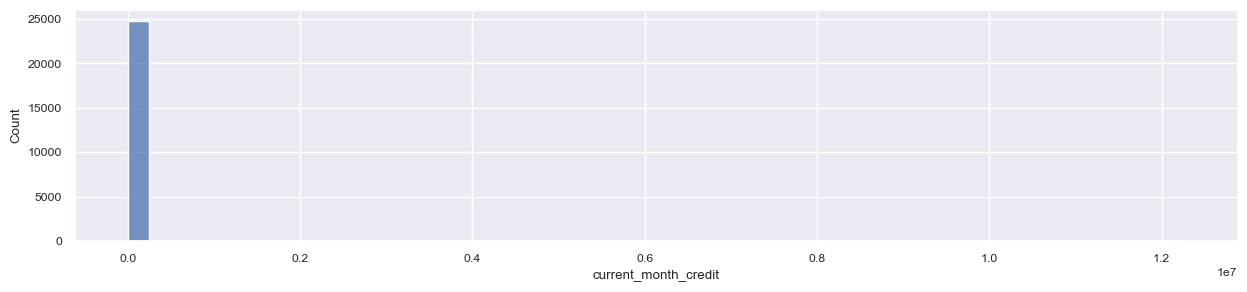

In [321]:
fig = plt.subplots(1,1, figsize=(15,3))

sns.histplot(data=df, x='current_month_credit', bins=50, multiple='dodge')

plt.show()

In [288]:
## Drop the row in the 'dependents' column with values greater than 20
df = df[df['dependents'] < 20]

df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
count,24827.000000,24827.000000,24827.000000,24827.000000,24827.000000,24827.000000,24827.000000,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,2.482700e+04,24827.000000,22062
mean,15121.258187,2090.251984,47.819793,0.344585,798.854634,2.215652,864.599186,7.005978e+03,7.103384e+03,7.069412e+03,6.642320e+03,3.503659e+03,3.360742e+03,3.661593e+03,3.344191e+03,7.041221e+03,7.075565e+03,0.181939,2019-10-25 01:20:56.132717056
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,2018-12-31 00:00:00
25%,7525.000000,1957.000000,36.000000,0.000000,409.000000,2.000000,159.000000,1.799005e+03,1.916810e+03,2.193485e+03,1.847980e+03,3.300000e-01,3.300000e-01,4.300000e-01,4.300000e-01,2.018245e+03,2.083485e+03,0.000000,2019-10-02 00:00:00
50%,15119.000000,2153.000000,46.000000,0.000000,837.000000,2.000000,531.000000,3.294700e+03,3.387900e+03,3.539360e+03,3.372760e+03,6.300000e-01,6.600000e-01,1.290300e+02,1.430700e+02,3.451170e+03,3.459420e+03,0.000000,2019-12-03 00:00:00
75%,22680.500000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1364.000000,6.629515e+03,6.654430e+03,6.663040e+03,6.517760e+03,7.149600e+02,8.146650e+02,1.428590e+03,1.428630e+03,6.663340e+03,6.647425e+03,0.000000,2019-12-20 00:00:00
max,30301.000000,2476.000000,90.000000,9.000000,1649.000000,3.000000,4782.000000,1.398486e+06,1.398486e+06,1.398486e+06,1.389627e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.398486e+06,1.398486e+06,1.000000,2019-12-31 00:00:00
std,8736.773508,273.932010,16.865595,0.832579,430.853600,0.663931,890.934791,2.130954e+04,2.200598e+04,2.047889e+04,1.866911e+04,8.167024e+04,3.070237e+04,5.401663e+04,2.376981e+04,2.073394e+04,2.195182e+04,0.385802,NaN


### **4. Exploratory Data Analysis (EDA)**

#### **4.1 Number of Churned Customers**

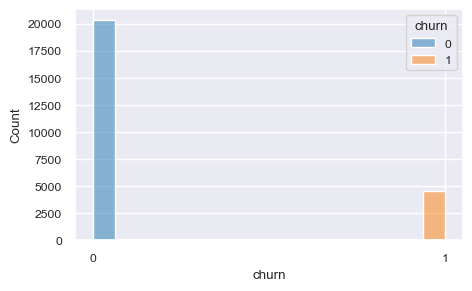

The total number of churned customers is 4517, which is 18.19% of the total number of customers:


In [289]:
## Plot the number of churned customers versus who did not
fig, ax = plt.subplots(1,1, figsize=(5,3))

sns.histplot(data=df, x='churn', hue='churn', palette=sns.color_palette('tab10', 2))
plt.xticks([0,1])

plt.show()

## Print the number of customers churned and not churned
no_churned = (df['churn'] == 1).sum()
total_customers = (len(df['customer_id']))
percent_churned = (round((no_churned / total_customers) * 100, 2))

print('The total number of churned customers is {}, which is {}% of the total number of customers:'.format(no_churned, percent_churned))

#### **4.2 Net Worth Category**

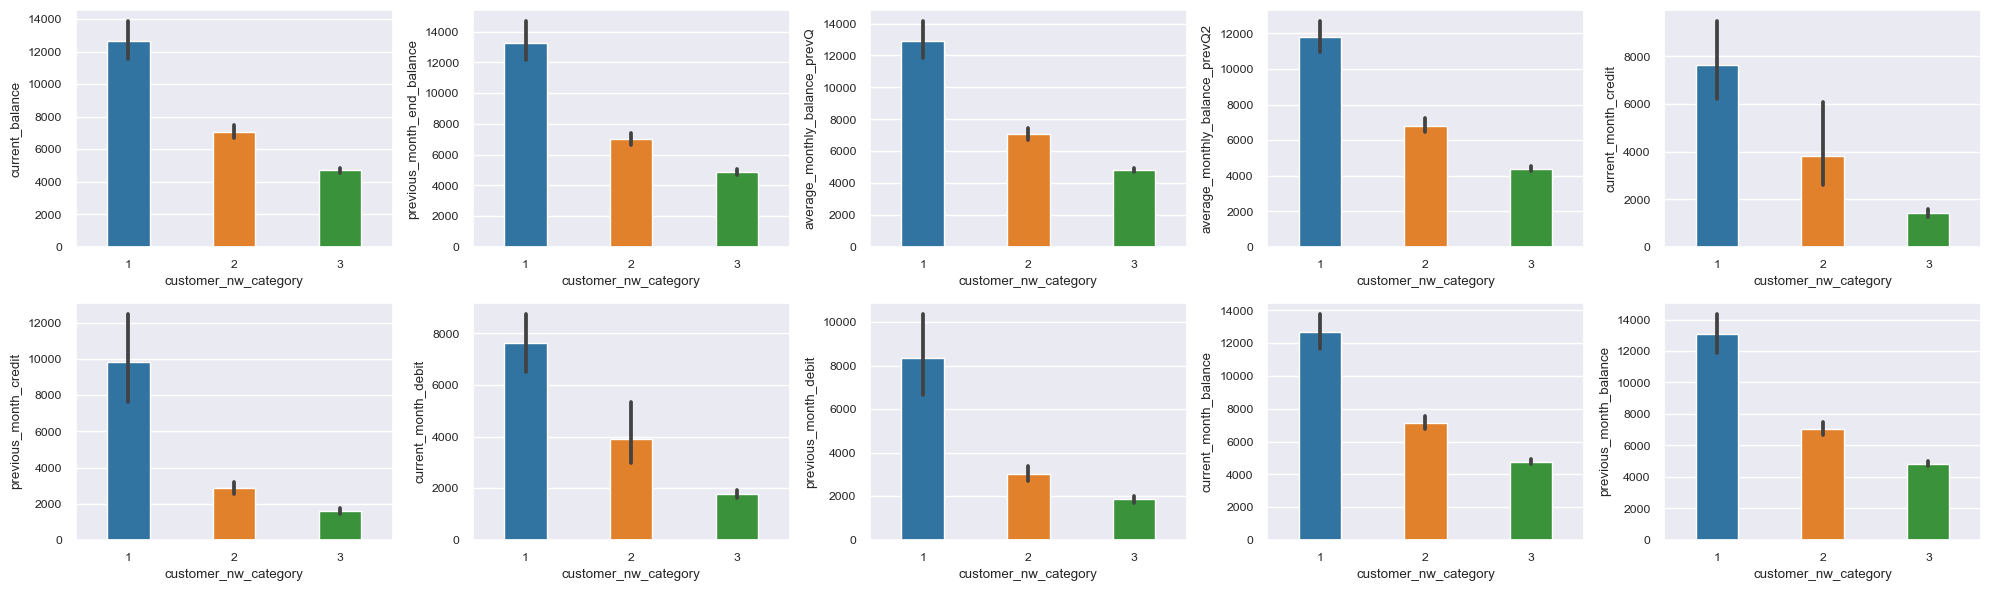

In [290]:
balance_columns = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7]
df_bal = df.iloc[:, balance_columns]

fig, axes = plt.subplots(2, 5, figsize=(20,6))

for i, ax in enumerate(axes.flatten()):
    if i < 10:
        sns.barplot(data=df_bal, x='customer_nw_category', y=df_bal.columns[i], width=0.4, palette=sns.color_palette('tab10'), ax=ax)
    
plt.tight_layout()
plt.show()

Based on the barplots above, the customer with value of 1 for the `customer_nw_category` column have the highest balance, credit, and debit, which means that the Category 1 have the highest net worth, followed by Category 2, then Category 3 for the lowest net worth.

#### **4.3 Relationship between Variables and Churn**

#### 4.3.1 Vintage, Last Transaction, and Churn
For this relationship, we will plot the relationship between time-related variables such as `vintage` - the duration of the relationship between the customer and the bank, and `last_transaction` - the date of the last transaction of the customer, to the customer's decision to churn or not.

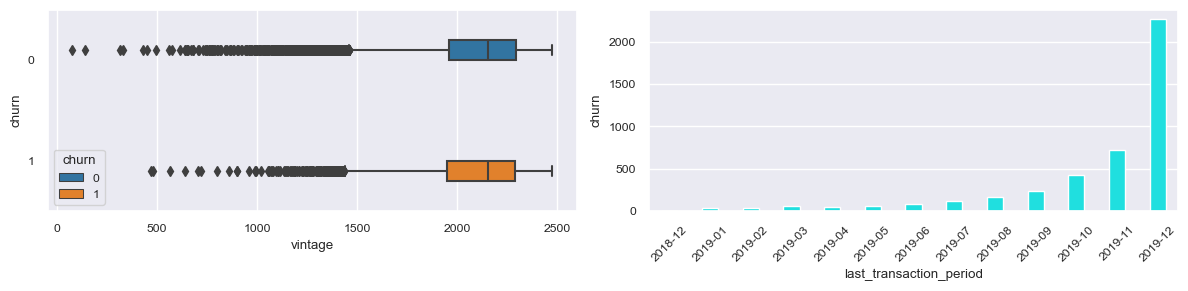

In [291]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
sns.set(font_scale=0.8)

## Plot the relationship between 'vintage' and 'churn'
sns.boxplot(data=df, x='vintage', y='churn', hue='churn', palette=sns.color_palette('tab10', 2), orient='h', width=0.4, ax=axes[0])

## Plot the relationship between 'last_transaction' and 'churn'
churn_transaction_count = df.groupby('last_transaction_period')['churn'].sum().reset_index()
sns.barplot(data=churn_transaction_count, x='last_transaction_period', y='churn', width=0.4, color='cyan', ax=axes[1])
axes[1].set_xticks(range(len(churn_transaction_count['last_transaction_period'])))
axes[1].set_xticklabels(churn_transaction_count['last_transaction_period'].astype(str), rotation=45)

plt.tight_layout()
plt.show()

1. For the boxplot showing the relationship between `vintage` and `churn` columns, the median values and interquartile ranges for both churned and not churned customers are almost similar, with few more outliers for the not churned customers. This indicates that there is a very little correlation on whether an employee will churn based on how long is their relationship with the bank.
2. For the barplot showing the relationship between `last_transaction_period` and `churn` columns, it clearly shows that customers with the latest transaction have churned. This could indicate that these transactions are withdrawals.

#### 4.2 Age, Gender, Dependents, and Occupation

For this relationship, we will plot the relationship between social variables such as `age`, `gender`, `dependents`, and `occupation` to the customer's decision to churn or not.

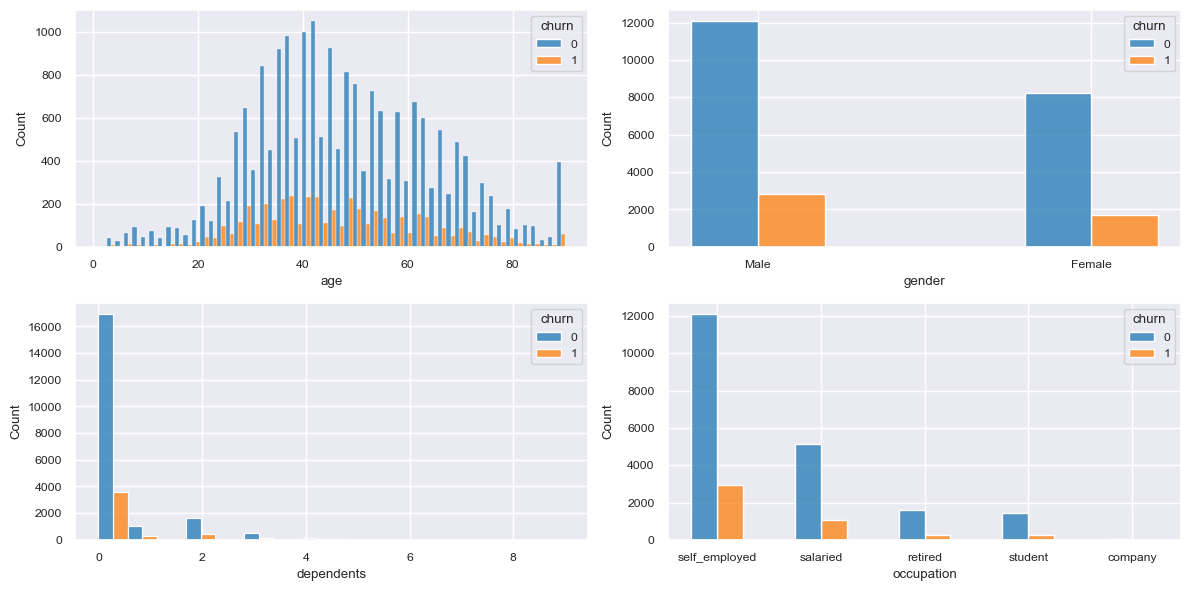

In [298]:
fig, axes = plt.subplots(2,2, figsize=(12,6))

## Plot the relationship between 'age' and 'churn'
sns.histplot(data=df, x='age', hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), ax=axes[0,0])

## Plot the relationship between 'gender' and 'churn'
sns.histplot(data=df, x='gender', hue='churn', multiple='dodge', shrink=0.4, palette=sns.color_palette('tab10', 2), ax=axes[0,1])

## Plot the relationship between 'dependents' and 'churn'
sns.histplot(data=df, x='dependents', hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), ax=axes[1,0])

## Plot the relationship between 'occupation' and 'churn'
sns.histplot(data=df, x='occupation', hue='churn', multiple='dodge', shrink=0.5, palette=sns.color_palette('tab10', 2), ax=axes[1,1])

plt.tight_layout()
plt.show()

1. The highest number of churns was found in the age range of 30 to 50. However, this is also the age range found to have the highest number of retained (not churned) customers.
2. More male customers have churned compared to female customers.
3. Most of the customers who have churned have no dependents.
4. Most of the customers who have churned are self-employed, and a noticeable number also came from salaried customers.

#### 4.3 City and Branch Code

Plot the relationship between location variables such as `city` and `branch_code` to the customer's decision to churn.

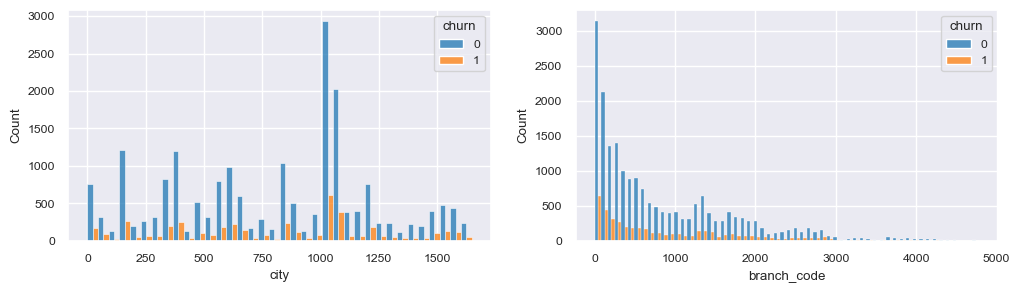

In [302]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

## Plot the relationship between 'city' and 'churn'
sns.histplot(data=df, x='city', hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), ax=axes[0])

## Plot the relationship between 'branch_code' and 'churn'
sns.histplot(data=df, x='branch_code', hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), ax=axes[1])

plt.show()

1. A noticeable number of churned customers was found on customers located in 1000s city.
2. Customers associated with lower branch codes tend to churn more.

#### 4.4 Net Worth, Balance, Debit, and Credit

For this relationship, we will plot the relationship between financial variables such as `customer_nw_category`, `current_balance`, `previous_month_end_balance`, `average_monthly_balance_prevQ`, `average_monthly_balance_prevQ2`, `current_month_credit`, `previous_month_credit`, `current_month_debit`, `previous_month_debit`, `current_month_balance`, and `previous_month_balance` to the decision of the customer to churn.

#### 4.4.1 Customer Net Worth

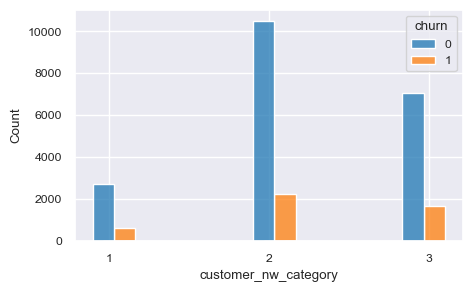

In [307]:
## Plot the relationship between 'customer_nw_category' and 'churn'
fig, ax = plt.subplots(1,1, figsize=(5,3))

sns.histplot(data=df, x='customer_nw_category', hue='churn', multiple='dodge', shrink=4, palette=sns.color_palette('tab10', 2))
plt.xticks([1,2,3])

plt.show()

1. Customers belonging in the Net Worth Category 2 are the most likely to churn, closely followed by customers belonging to Net Worth Category 3.